In [133]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_data_complete= pd.merge(ride_data, city_data,how='left', on=['city'])
# Display the data table for preview
ride_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [134]:
#Group Cities by type
#Urban
by_urban_type=ride_data_complete[ride_data_complete["type"] == "Urban"].groupby([ride_data_complete["city"]])
#Suburban
by_suburban_type=ride_data_complete[ride_data_complete["type"] == "Suburban"].groupby([ride_data_complete["city"]])
#Rural
by_rural_type=ride_data_complete[ride_data_complete["type"] == "Rural"].groupby([ride_data_complete["city"]])

#Get metrics for each type
#Average Fare ($), Total Number of Rides, Total Number of Drivers (Per City)
#Urban
avg_fare_urban=by_urban_type['fare'].mean()
num_rides_urban=by_urban_type['ride_id'].count()
num_drivers_urban=by_urban_type['driver_count'].mean()

#Suburban
avg_fare_suburban=by_suburban_type['fare'].mean()
num_rides_suburban=by_suburban_type['ride_id'].count()
num_drivers_suburban=by_suburban_type['driver_count'].mean()

#Rural
avg_fare_rural=by_rural_type['fare'].mean()
num_rides_rural=by_rural_type['ride_id'].count()
num_drivers_rural=by_rural_type['driver_count'].mean()


## Bubble Plot of Ride Sharing Data

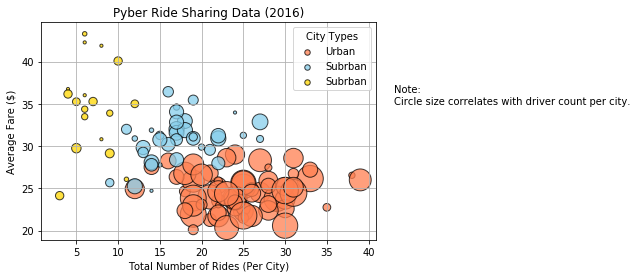

In [135]:
# Build the scatter plots for each city types
#Urban
plt.scatter(num_rides_urban, avg_fare_urban, label = "Urban", s=num_drivers_urban * 10, color=["coral"], edgecolor="black", alpha = .75, marker="o")

#Suburban
plt.scatter(num_rides_suburban, avg_fare_suburban, label = "Subrban", s=num_drivers_suburban * 10, color=["skyblue"], edgecolor="black", alpha = .75, marker="o")

#Rural
plt.scatter(num_rides_rural, avg_fare_rural, label = "Subrban", s=num_drivers_rural * 10, color=["gold"], edgecolor="black", alpha = .75, marker="o")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend=plt.legend(title= "City Types",loc='best')

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
# Save Figure
plt.savefig("Pyber_Images/PyberRideSharingData.png", bbox_inches='tight')

In [136]:
# Show plot
plt.show()

## Total Fares by City Type

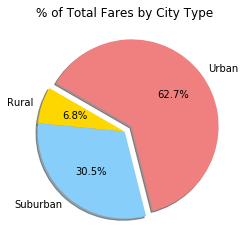

In [137]:
# Calculate Type Percents
total_fare = ride_data_complete.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels=["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Pyber_Images/PyberTotalFaresByCityType.png")
plt.show()

In [138]:
# Show Figure
plt.show()

## Total Rides by City Type

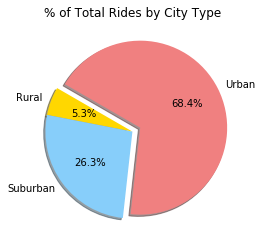

In [139]:
# Calculate Ride Percents
ride_count=ride_data_complete.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels=["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_Images/PyberTotalRidesByCityType.png")

In [140]:
# Show Figure
plt.show()

## Total Drivers by City Type

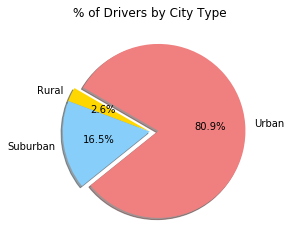

In [141]:
# Calculate Driver Percents
driver_count=city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels=["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(driver_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Drivers by City Type")

# Save Figure
plt.savefig("Pyber_Images/PyberTotalDriversByCityType.png")

In [110]:
# Show Figure
plt.show()

Conclusions:

A number of insights can be drawn from the Pyber data. We see that the percentage of total rides and total fares are relatively similar with urban areas making up around two thirds in both cases with Suburban coming second and Rural a distant third. This is not surprising given the fact that the population demographics of each area can account for these differences in usage. It would be helpful to look at these numbers on a per capita basis as there can be a wide difference in sizes within each city type. Comparing the three areas based on average fare, we see an inverse trend when comparing community size and fare amount. Rural areas have a higher average fare, with suburban and urban following. A number of factors can contribute to this. Looking at the percent of drivers by city type, a 81% of drivers are found in urban areas with only 2.6% in rural areas. Simple economics implies that with a larger supply of drivers, fares will be driven down based on competition. With less drivers in rural and suburban areas, there is less supply which will cause fares to rise for a more scarce resource. There are other factors that could be invetigated when understanding Pyber's pricing methodology. Time and distance of rides are a metric to compare and would help us to understand the fare differences on a more granular level. 